# CH2: Machine Learning for Regression

## 2.1 Load the data

In [1]:
import pandas  as pd
import numpy   as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("../data/data.csv")  # read the csv file
df.head()  # show the first 5 rows

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
len(df)  # number of rows

11914

/home/joelinux/anaconda3/envs/ML_BOOKCAMP/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/joelinux/anaconda3/envs/ML_BOOKCAMP/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='MSRP', ylabel='Count'>

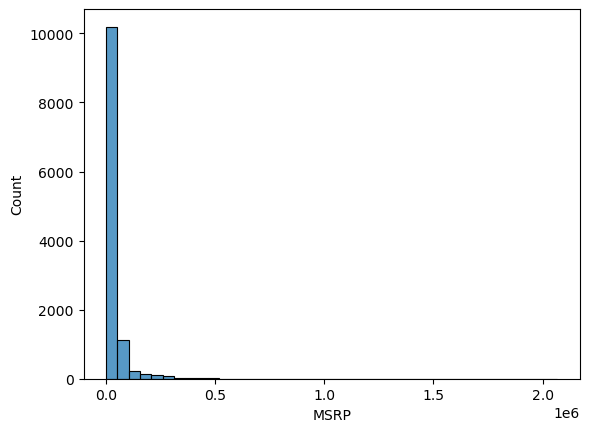

In [5]:
# how the target looks like?
sns.histplot(df.MSRP, bins=40)  # histogram of the target

/home/joelinux/anaconda3/envs/ML_BOOKCAMP/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/joelinux/anaconda3/envs/ML_BOOKCAMP/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='MSRP', ylabel='Count'>

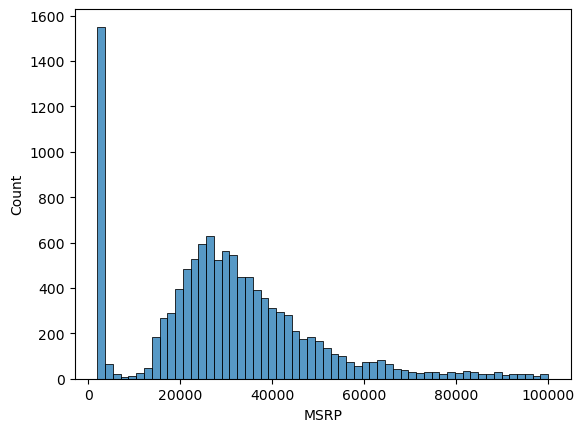

In [6]:
# closer look
sns.histplot(df.MSRP[df.MSRP < 100000])  # histogram of the target

/home/joelinux/anaconda3/envs/ML_BOOKCAMP/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/joelinux/anaconda3/envs/ML_BOOKCAMP/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='MSRP', ylabel='Count'>

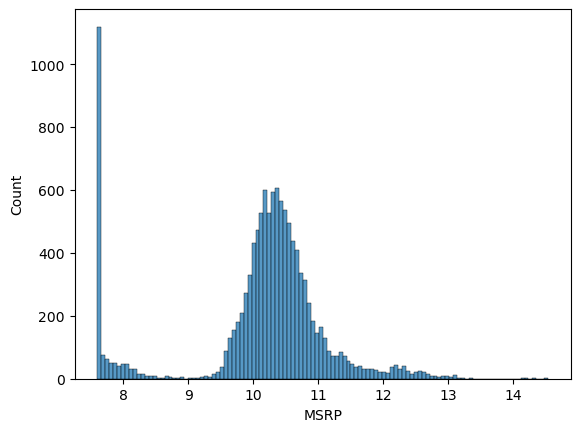

In [8]:
# log transformation
log_price = np.log1p(df.MSRP)  # log transformation of the target
sns.histplot(log_price)  # histogram of the target

## 2.2 Checking for missing values

In [9]:
df.isnull().sum()  # check for missing values

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

## 2.3 Validation Framework

In [16]:
# change the name of columns
df.columns = df.columns.str.lower().str.replace(' ', '_')
string_columns = list(df.dtypes[df.dtypes == 'object'].index)  # list of columns with string type
# apply the function to all the columns with string type
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')  # apply the function to all the columns with string type

In [17]:
# splitting data into validation, test, and training sets
n = len(df)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - n_val - n_test

np.random.seed(2105)
idx = np.arange(n)
np.random.shuffle(idx)  # shuffle the indices
df_shuffled = df.iloc[idx]  # shuffle the dataframe
df_train = df_shuffled.iloc[:n_train].copy()  # training set
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()  # validation set
df_test = df_shuffled.iloc[n_train+n_val:].copy()  # test set

In [19]:
# applyin the log transformation to the target
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)
# to avoid using accidentally target values in the model, we drop the target column
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

## 2.4 Linear Regression implemented with Numpy

In [12]:
def train_linear_regression(X, y):
    # adding the dummy column
    ones = np.ones(X.shape[0])  # ones vector
    X = np.column_stack([ones, X])  # add the ones column to the feature matrix
    XTX = X.T.dot(X)  # matrix multiplication
    XTX_inv = np.linalg.inv(XTX)  # inverse of the matrix
    w = XTX_inv.dot(X.T).dot(y)  # matrix multiplication
    return w[0], w[1:]  # return the first element of the vector, and the rest of the vector

## 2.5 Baseline solution

In [20]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
df_num = df_train[base]

In [21]:
# dealing with null  values
df_num = df_num.fillna(0)  # replace null values with 0